# DBM Mask R-CNN Code

*Upload the unzipped version of the DBM Mask RCNN folder into your Google Drive's "My Drive" before running the code for the first time, or if any of the files inside the folder has been updated*

In [ ]:
!pip uninstall keras-nightly
!pip install h5py==2.10.0

Found existing installation: keras-nightly 2.5.0.dev2021032900
Uninstalling keras-nightly-2.5.0.dev2021032900:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/keras/*
    /usr/local/lib/python3.7/dist-packages/keras_nightly-2.5.0.dev2021032900.dist-info/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/keras/applications/resnet50.py
    /usr/local/lib/python3.7/dist-packages/keras/engine/network.py
    /usr/local/lib/python3.7/dist-packages/keras/engine/topology.py
    /usr/local/lib/python3.7/dist-packages/keras/initializers.py
    /usr/local/lib/python3.7/dist-packages/keras/layers/experimental/__init__.py
    /usr/local/lib/python3.7/dist-packages/keras/layers/experimental/preprocessing/__init__.py
    /usr/local/lib/python3.7/dist-packages/keras/objectives.py
    /usr/local/lib/python3.7/dist-packages/keras/optimizers/__init__.py
    /usr/local/lib/python3.7/dist-packages/keras/optimizers/schedules/__init__.py
    /usr/local/lib/p

### Importing the required libraries for Weights & Biases integration and for Mask R-CNN code

In [ ]:
import os
import numpy as np
!pip install tensorflow==1.15.0rc2
import tensorflow as tf
!pip install keras==2.2.5

     |████████████████████████████████| 412.3 MB 35 kB/s 
     |████████████████████████████████| 3.8 MB 46.4 MB/s 
     |████████████████████████████████| 503 kB 59.7 MB/s 
     |████████████████████████████████| 50 kB 9.0 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7553 sha256=92f2c02366403d0a3da484e056cfd1b87c8a7d6f5c35946aa5fa9a61a42251f0
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

### Installing and logging into Weights & Biases account

In [ ]:
%%capture
!pip install wandb

In [ ]:
import wandb
from wandb.keras import WandbCallback

!wandb login

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


### Mounting drive to upload files from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


### Uploading DBM dataset file (with images and XML files) and visualize, utils & model Python files

In [ ]:
#!unzip "/gdrive/My Drive/DBM Mask RCNN/resizedDBM.zip"
#!unzip "/gdrive/My Drive/DBM Mask RCNN/DBM.zip"
!unzip "//gdrive//My Drive//DBM Mask RCNN//Updated New Data.zip"
!cp "/gdrive/My Drive/DBM Mask RCNN/visualize_saveimage_orderedfilename.py" "visualize.py"
!cp "/gdrive/My Drive/DBM Mask RCNN/utils.py" "utils.py"
!cp "/gdrive/My Drive/DBM Mask RCNN/model_savetodrive.py" "model.py"

Archive:  //gdrive//My Drive//DBM Mask RCNN//Updated New Data.zip
   creating: Updated New Data/annots/
  inflating: Updated New Data/annots/1.xml  
  inflating: Updated New Data/annots/10.xml  
  inflating: Updated New Data/annots/100.xml  
  inflating: Updated New Data/annots/101.xml  
  inflating: Updated New Data/annots/102.xml  
  inflating: Updated New Data/annots/103.xml  
  inflating: Updated New Data/annots/104.xml  
  inflating: Updated New Data/annots/105.xml  
  inflating: Updated New Data/annots/106.xml  
  inflating: Updated New Data/annots/107.xml  
  inflating: Updated New Data/annots/108.xml  
  inflating: Updated New Data/annots/109.xml  
  inflating: Updated New Data/annots/11.xml  
  inflating: Updated New Data/annots/110.xml  
  inflating: Updated New Data/annots/111.xml  
  inflating: Updated New Data/annots/112.xml  
  inflating: Updated New Data/annots/113.xml  
  inflating: Updated New Data/annots/114.xml  
  inflating: Updated New Data/annots/115.xml  
  infla

### Importing the required libraries for Mask R-CNN code

In [ ]:
import xml.etree
from numpy import zeros, asarray
from random import sample

!pip install mrcnn
import mrcnn
import mrcnn.config
import visualize
import utils
import model

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

     |████████████████████████████████| 51 kB 295 kB/s 
  Created wheel for mrcnn: filename=mrcnn-0.2-py3-none-any.whl size=54931 sha256=718a34495e0549554198b92dac351e3a1b6440f3c50425afcbdf983e35d62236
  Stored in directory: /root/.cache/pip/wheels/1d/94/0d/03ff96abc43d2d6c8299a92cbb4eced2a1eda3ca7911c19427
Successfully built mrcnn


Using TensorFlow backend.
wandb: WARNING Keras version 2.2.5 is not fully supported. Required keras >= 2.4.0


### DBM Configuration

In [ ]:
class DBMConfig(mrcnn.config.Config): 
    NAME = "DBM_cfg"

    BACKBONE = "resnet50"

    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    
    NUM_CLASSES = 2 #(background/non-DBM + DBM)

    STEPS_PER_EPOCH = 738

    PRE_NMS_LIMIT = 6000

    RPN_ANCHOR_SCALES = (16, 32, 64, 128, 256)
    BACKBONE_STRIDES = [4, 8, 16, 32, 64]
    IMAGE_MAX_DIM = 1024
    IMAGE_MIN_DIM = 1024

    DETECTION_MAX_INSTANCES = 1000
  
DBM_config = DBMConfig()
DBM_config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        1000
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  1024
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INST

### DBM Dataset

In [ ]:
randimage_id = []
file = open("/gdrive/My Drive/DBM Mask RCNN/test_set_images_651f06a7-c56a-49a2-8ba7-25be2ad1dba4.txt", "r")
file_lines = file.read()
file_lines = file_lines.rstrip("\n")
array = file_lines.split("\n")
for num in array:
  randimage_id.append(int(num))
print(randimage_id)

[518, 274, 318, 477, 439, 714, 502, 238, 356, 194, 658, 514, 384, 638, 219, 26, 623, 437, 673, 709, 620, 285, 427, 225, 531, 619, 374, 681, 569, 136, 107, 731, 155, 489, 39, 380, 220, 227, 113, 5, 128, 510, 599, 664, 586, 675, 257, 292, 287, 193, 166, 96, 691, 226, 496, 716, 183, 682, 443, 258, 150, 603, 15, 196, 460, 295, 143, 190, 575, 424, 95, 435, 526, 344, 255, 99, 364, 639, 262, 512, 447, 577, 264, 342, 404, 243, 388, 608, 643, 288, 2, 110, 33, 684, 206, 299, 661, 662, 444, 485, 325, 217, 480, 362, 724, 29, 171, 506, 85, 579, 659, 156, 423, 20, 244, 499, 645, 533, 173, 412, 84, 289, 223, 222, 733, 712, 365, 597, 151, 497, 420, 391, 605, 609, 686, 583, 121, 473, 649, 385, 207, 467, 718, 261, 415, 565, 175, 637, 38, 62, 513, 297, 523, 393, 604, 253, 381, 163, 19, 247, 455, 60, 30, 349, 105, 363, 100, 386, 249, 203, 159, 617, 687, 572, 505, 338, 593, 339, 500, 211, 323, 260, 63, 677, 407, 430, 275, 544, 556, 493, 137, 266, 517, 678, 341, 246, 366, 91, 102, 265, 70, 125, 308, 454, 39

In [ ]:
class DBMDataset(utils.Dataset):
  
  def load_dataset(self, dataset_dir, is_train = True):
    self.add_class("dataset", 1, "DBM")
    
    images_dir = dataset_dir + '/images/'
    annotations_dir = dataset_dir + '/annots/'
    
    for filename in os.listdir(images_dir):
      image_id = filename.split('.')[0] # removes .jpg from the name of the file

      # skip all 80 randomly choosen images if we are building the train set
      # allow all the other images to be in the train set
      if is_train and int(image_id) in randimage_id:
        continue

      # allow all 80 randomly choosen images if we are building the train set,
      # skip all the other images to be in the training set
      if not is_train and int(image_id) not in randimage_id:
        continue
      
      img_path = images_dir + filename
      ann_path = annotations_dir + image_id + '.xml'
      
      self.add_image('dataset', image_id = image_id, path = img_path, annotation = ann_path)

  def extract_boxes(self, filename):
    tree = xml.etree.ElementTree.parse(filename)
    root = tree.getroot()
    
    boxes = list()
    for box in root.findall('.//bndbox'):
      xmin = int(box.find('xmin').text)
      ymin = int(box.find('ymin').text)
      xmax = int(box.find('xmax').text)
      ymax = int(box.find('ymax').text)
      coors = [xmin, ymin, xmax, ymax]
      boxes.append(coors)
    
    width = int(root.find('.//size/width').text)
    height = int(root.find('.//size/height').text)
    return boxes, width, height
    
  def load_mask(self, image_id):
    info = self.image_info[image_id]
    path = info['annotation']
    boxes, w, h = self.extract_boxes(path)
    masks = zeros([h, w, len(boxes)], dtype = 'uint8')

    class_ids = list()
    for i in range(len(boxes)):
      box = boxes[i]
      row_s, row_e = box[1], box[3]
      col_s, col_e = box[0], box[2]
      masks[row_s:row_e, col_s:col_e, i] = 1
      class_ids.append(self.class_names.index('DBM'))
    return masks, asarray(class_ids, dtype = 'int32')

### Prepare training and validation sets

In [ ]:
train_set = DBMDataset()
train_set.load_dataset(dataset_dir = 'Updated New Data', is_train = True)
train_set.prepare()

valid_dataset = DBMDataset()
valid_dataset.load_dataset(dataset_dir = 'Updated New Data', is_train = False)
valid_dataset.prepare()

### Initializing and configuring Weights & Biases with the training run

In [ ]:
run = wandb.init(project='mask-rcnn-testing')

wandb: Currently logged in as: ronithsaju (use `wandb login --relogin` to force relogin)


### Loading the model

In [ ]:
DBM_model = model.MaskRCNN(mode = "inference", config = DBM_config, model_dir = './')




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead

Instructions for updating:
Use `tf.cast` instead.


In [ ]:
DBM_model.load_weights(filepath = '/gdrive/My Drive/DBM Mask RCNN/Config Files/dbm_cfg20210602T1629/mask_rcnn_dbm_cfg_0057.h5', 
                       by_name = True)

Re-starting from epoch 57


In [ ]:
#os.makedirs('/gdrive/My Drive/DBM Mask RCNN/DBM Model Results/change this name')

### Displaying and saving all the results into DBM Model Results folder (inside DBM Mask RCNN folder), and calculating mAP

In [ ]:
image_id = 0
APs = []
mPrecision = []
mRecall = []

TPs = 0
FPs = 0
FNs = 0
relativeTPs = []
relativeFPs = []
relativeFNs = []

total_images = 0
total_images_noGT = 0

FP_no_DBM = 0
total_FP_no_DBM = 0

list_accuracy = []

for image_id in valid_dataset.image_ids:
  image, image_meta, gt_class_id, gt_bbox, gt_mask = model.load_image_gt(valid_dataset, DBM_config, image_id, use_mini_mask=False)

  #print("===================================================================================================================")
  print("image_id: ", image_id)
  info = valid_dataset.image_info[image_id]
  results = DBM_model.detect([image], verbose=0)
  r = results[0]

  if len(gt_bbox) != 0:

    '''
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                                valid_dataset.class_names, r['scores'], 
                                title=str(info["id"]), show_mask = False, save_image = True, filename = int(info["id"]))
    
    visualize.display_instances(image, gt_bbox, gt_mask, gt_class_id, 
                                valid_dataset.class_names, 
                                title=str(info["id"]), show_mask = False, save_image = True, filename = int(info["id"]))
    

    visualize.display_differences(image, gt_bbox, gt_class_id, gt_mask, 
                                  r['rois'], r['class_ids'], r['scores'], r['masks'], 
                                  valid_dataset.class_names, title=str(info["id"]), 
                                  ax=None, show_mask=False, show_box=True, 
                                  iou_threshold=0.5, score_threshold=0.5, save_image=True, filename = int(info["id"])) #uncomment above cell if save_image = True
    '''

    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id, gt_mask, r['rois'], r['class_ids'], r['scores'], r['masks'], iou_threshold=0.5)

    APs.append(AP)
    #visualize.plot_precision_recall(AP, precisions, recalls)
    #print("AP: ", AP)
    #print("precisions: ", precisions)
    #print("recalls: ", recalls)
    #print("overlaps: ", overlaps)
    #print("APs: ", APs)
    #print("precision value: ", precisions[-2])
    mPrecision.append(precisions[-2])

    recall, positive_ids = utils.compute_recall(r['rois'], gt_bbox, 0.5)
    #print("recall value: ", recall)
    mRecall.append(recall)

    #print("mAP: ", np.mean(APs))
    #print("Mean Precision: ", np.mean(mPrecision))
    #print("mAR: ", np.mean(mRecall))

    gt_match, pred_match, overlaps = utils.compute_matches(gt_bbox, gt_class_id, gt_mask, 
                                                           r['rois'], r['class_ids'], r['scores'], r['masks'], 
                                                           iou_threshold=0.5)
    
    TP = np.sum(pred_match > -1)
    #print("TP: ", TP)
    TPs += TP

    FP = np.sum(pred_match == -1)
    #print("FP: ", FP)
    FPs += FP

    FN = len(gt_match) - np.sum(pred_match > -1)
    #print("FN: ", FN)
    FNs += FN


    if(len(pred_match) != 0):
      relativeTP = TP/len(pred_match)
      #print("relativeTP: ", relativeTP)
      relativeTPs.append(relativeTP)

      relativeFP = FP/len(pred_match)
      #print("relativeFP: ", relativeFP)
      relativeFPs.append(relativeFP)

    else:
      relativeTP = TP
      #print("relativeTP: ", relativeTP)
      relativeTPs.append(relativeTP)

      relativeFP = FP
      #print("relativeFP: ", relativeFP)
      relativeFPs.append(relativeFP)

    relativeFN = FN/len(gt_match)
    #print("relativeFN: ", relativeFN)
    relativeFNs.append(relativeFN)

    total_images += 1
    #print("Total n.o. of images: ", total_images)

    #utils.compute_ap_range(gt_bbox, gt_class_id, gt_mask, r['rois'], r['class_ids'], r['scores'], r['masks'], iou_thresholds=None, verbose=1)

    dict_accuracy = {
      "image_id": image_id,
      "AP": AP,
      "Precision": precisions[-2],
      "Recall": recall,
      "TP": TP,
      "FP": FP,
      "FN": FN,
      "GT": len(gt_bbox)
    }

    list_accuracy.append(dict_accuracy)

  else:

    dict_accuracy = {
      "image_id": image_id,
      "TP": 0,
      "FP": len(r['rois']),
      "GT": 0
    }

    list_accuracy.append(dict_accuracy)

    #print("No DBMs present in image %s" % str(image_id))
    total_images_noGT += 1

    '''
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                                valid_dataset.class_names, r['scores'], 
                                title=str(info["id"]), show_mask = False, save_image = True, filename = int(info["id"]))

    '''

    FP_no_DBM = len(r['rois'])
    total_FP_no_DBM += FP_no_DBM

image_id:  0
image_id:  1
image_id:  2
image_id:  3
image_id:  4
image_id:  5
image_id:  6
image_id:  7
image_id:  8
image_id:  9
image_id:  10
image_id:  11
image_id:  12
image_id:  13
image_id:  14
image_id:  15
image_id:  16
image_id:  17
image_id:  18
image_id:  19
image_id:  20
image_id:  21
image_id:  22
image_id:  23
image_id:  24
image_id:  25
image_id:  26
image_id:  27
image_id:  28
image_id:  29
image_id:  30
image_id:  31
image_id:  32
image_id:  33
image_id:  34
image_id:  35
image_id:  36
image_id:  37
image_id:  38
image_id:  39
image_id:  40
image_id:  41
image_id:  42
image_id:  43
image_id:  44
image_id:  45
image_id:  46
image_id:  47
image_id:  48
image_id:  49
image_id:  50
image_id:  51
image_id:  52
image_id:  53
image_id:  54
image_id:  55
image_id:  56
image_id:  57
image_id:  58
image_id:  59
image_id:  60
image_id:  61
image_id:  62
image_id:  63
image_id:  64
image_id:  65
image_id:  66
image_id:  67
image_id:  68
image_id:  69
image_id:  70
image_id:  71
im

In [ ]:
print("mAP: ", np.mean(APs))
print("Mean Precision: ", np.mean(mPrecision))
print("mAR: ", np.mean(mRecall))

print("Total TP: ", TPs)
print("Total FP: ", FPs)
print("Total FN: ", FNs)

print("Average Relative TP: ", np.mean(relativeTPs))
print("Average Relative FP: ", np.mean(relativeFPs))
print("Average Relative FN: ", np.mean(relativeFNs))

print("Total FP no DBM: ", total_FP_no_DBM)
print("Total num of images with no DBMs: ", total_images_noGT)
total_FP_combined = FPs + total_FP_no_DBM

print("Total Combined FP: ", total_FP_combined)

mAP:  0.7284423655123138
Mean Precision:  0.7548002966388567
mAR:  0.7666567721612995
Total TP:  1641
Total FP:  297
Total FN:  1968
Average Relative TP:  0.7548002966388567
Average Relative FP:  0.22609142310636612
Average Relative FN:  0.232663421386608
Total FP no DBM:  94
Total num of images with no DBMs:  64
Total Combined FP:  391


In [ ]:
wandb.log({"mAP": np.mean(APs)})
wandb.log({"Mean Precision": np.mean(mPrecision)})
wandb.log({"mAR": np.mean(mRecall)})

wandb.log({"Total TP": TPs})
wandb.log({"Total FP": FPs})
wandb.log({"Total FN": FNs})

wandb.log({"Average Relative TP": np.mean(relativeTPs)})
wandb.log({"Average Relative FP": np.mean(relativeFPs)})
wandb.log({"Average Relative FN": np.mean(relativeFNs)})

wandb.log({"Total FP no DBMs": total_FP_no_DBM})
wandb.log({"Total num of images with no DBMs": total_images_noGT})
wandb.log({"Total Combined FP": total_FP_combined})

In [ ]:
print(list_accuracy)

[{'image_id': 0, 'AP': 0.6425098118828793, 'Precision': 0.85, 'Recall': 0.64, 'TP': 17, 'FP': 3, 'FN': 8, 'GT': 25}, {'image_id': 1, 'TP': 0, 'FP': 1, 'GT': 0}, {'image_id': 2, 'TP': 0, 'FP': 0, 'GT': 0}, {'image_id': 3, 'AP': 0.5, 'Precision': 0.5, 'Recall': 0.5, 'TP': 2, 'FP': 2, 'FN': 2, 'GT': 4}, {'image_id': 4, 'AP': 0.7368420958518982, 'Precision': 0.9333333333333333, 'Recall': 0.7368421052631579, 'TP': 14, 'FP': 1, 'FN': 5, 'GT': 19}, {'image_id': 5, 'TP': 0, 'FP': 0, 'GT': 0}, {'image_id': 6, 'TP': 0, 'FP': 11, 'GT': 0}, {'image_id': 7, 'AP': 0.3012545072610995, 'Precision': 0.96875, 'Recall': 0.28292682926829266, 'TP': 62, 'FP': 2, 'FN': 143, 'GT': 205}, {'image_id': 8, 'AP': 0.9861111111111112, 'Precision': 0.8888888888888888, 'Recall': 1.0, 'TP': 8, 'FP': 1, 'FN': 0, 'GT': 8}, {'image_id': 9, 'AP': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'TP': 1, 'FP': 0, 'FN': 0, 'GT': 1}, {'image_id': 10, 'AP': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'TP': 3, 'FP': 0, 'FN': 0, 'GT': 3}, {'imag

In [ ]:
more_than_37_correct = 0
more_than_37_wrong = 0
less_than_38_correct = 0
less_than_38_wrong = 0
more_than_37_wrong_list = []
less_than_38_wrong_list = []
deviation_more_than_37_list = []
deviation_less_than_38_list = []

for dicts in list_accuracy:
  if dicts['GT'] > 37:
    deviation_more_than_37_list.append((dicts['TP'] + dicts['FP']) - dicts['GT'])
    if (dicts['TP'] + dicts['FP']) > 37:
      more_than_37_correct += 1
    else:
      more_than_37_wrong += 1
      more_than_37_wrong_list.append("GTs:" + str(dicts['GT']) + "/" + "Preds:" + str(dicts['TP'] + dicts['FP']))
      print("Wrong 38 or more DBMs:", dicts['image_id'])
  
  else:
    deviation_less_than_38_list.append((dicts['TP'] + dicts['FP']) - dicts['GT'])
    if (dicts['TP'] + dicts['FP']) < 38:
      less_than_38_correct += 1
    else:
      less_than_38_wrong += 1
      less_than_38_wrong_list.append("GTs:" + str(dicts['GT']) + "/" + "Preds:" + str(dicts['TP'] + dicts['FP']))
      print("Wrong less than 38 DBMs:", dicts['image_id'])

print("\nTotal num of images with 38 or more DBMs:", more_than_37_correct + more_than_37_wrong)
print("Correctly identified:", more_than_37_correct)
print("Wrongly identified:", more_than_37_wrong, more_than_37_wrong_list)

print("Mean deviation:", np.mean(deviation_more_than_37_list))
print("Maximum deviation:", max(deviation_more_than_37_list))
print("Minimum deviation:", min(deviation_more_than_37_list))
print("Standard deviation:", np.std(deviation_more_than_37_list))


print("\nTotal num of images with less than 38 DBMs:", less_than_38_correct + less_than_38_wrong)
print("Correctly identified:", less_than_38_correct)
print("Wrongly identified:", less_than_38_wrong, less_than_38_wrong_list)

print("Mean deviation:", np.mean(deviation_less_than_38_list))
print("Maximum deviation:", max(deviation_less_than_38_list))
print("Minimum deviation:", min(deviation_less_than_38_list))
print("Standard deviation:", np.std(deviation_less_than_38_list))

Wrong 38 or more DBMs: 33
Wrong 38 or more DBMs: 75
Wrong less than 38 DBMs: 173
Wrong 38 or more DBMs: 180

Total num of images with 38 or more DBMs: 20
Correctly identified: 17
Wrongly identified: 3 ['GTs:868/Preds:11', 'GTs:44/Preds:32', 'GTs:38/Preds:29']
Mean deviation: -83.8
Maximum deviation: 2
Minimum deviation: -857
Standard deviation: 187.52855782520166

Total num of images with less than 38 DBMs: 201
Correctly identified: 200
Wrongly identified: 1 ['GTs:30/Preds:39']
Mean deviation: 0.4925373134328358
Maximum deviation: 13
Minimum deviation: -20
Standard deviation: 2.923773549883056


In [ ]:
print(deviation_more_than_37_list)
print(deviation_less_than_38_list)

[-141, -37, -857, 2, -4, -12, -37, -11, -15, -110, -16, -13, -1, -41, -34, -260, -9, -6, -23, -51]
[-5, 1, 0, 0, -4, 0, 11, 1, 0, 0, 0, 0, -1, -1, -1, 0, -2, 2, 1, 0, 0, 1, 1, 0, 1, -6, 1, 2, 0, -10, 1, 0, 0, 1, 0, -2, 0, 1, -4, 13, 0, 1, -1, 0, 2, 1, 1, 4, 3, -3, -1, 3, 0, 2, 0, 0, 1, 0, 0, 6, 1, 0, 0, 1, 1, 3, -1, -1, -1, -20, 2, 0, 7, 1, 0, 1, 1, -1, 1, -3, 5, 1, 1, 2, 1, 0, 0, 3, 0, 6, 1, -4, 0, 3, 6, 0, -3, 0, -1, 2, -1, 1, 3, 5, 0, 1, 2, 0, -1, -2, 0, 1, 0, 0, -5, 3, 4, 9, 3, 2, 0, 0, 3, 0, 4, 0, 0, -1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 3, 0, -4, 0, 0, 0, 0, 1, 4, 6, 0, -1, 0, 0, 1, -4, -1, 0, 0, 0, 9, 0, 0, -2, 1, 0, 1, 1, 0, 0, 1, 1, -1, -2, 0, 1, 1, 5, 2, 0, 0, -2, 0, 2, 1, 0, 1, -1, 4, -2, 0, 0, 0, -5, 0, 1, 0, 4, 1, 0, 1, -1, -1, 0]


In [ ]:
image_ids_more_than_37_GTs = []
AP_more_than_37_GTs = []
precision_more_than_37_GTs = []
recall_more_than_37_GTs = []

for dicts in list_accuracy:
  if dicts['GT'] > 37:
    image_ids_more_than_37_GTs.append(dicts['image_id'])
    AP_more_than_37_GTs.append(dicts['AP'])
    precision_more_than_37_GTs.append(dicts['Precision'])
    recall_more_than_37_GTs.append(dicts['Recall'])

print(image_ids_more_than_37_GTs)
print(len(image_ids_more_than_37_GTs))

print("New mAP:", np.mean(AP_more_than_37_GTs))
print("New Mean Precision:", np.mean(precision_more_than_37_GTs))
print("New Mean Recall:", np.mean(recall_more_than_37_GTs))

[7, 11, 33, 58, 64, 75, 98, 102, 112, 124, 128, 136, 143, 151, 155, 169, 180, 189, 212, 217]
20
New mAP: 0.5720166598374732
New Mean Precision: 0.9130712714575292
New Mean Recall: 0.5946070597460447


image_id:  173


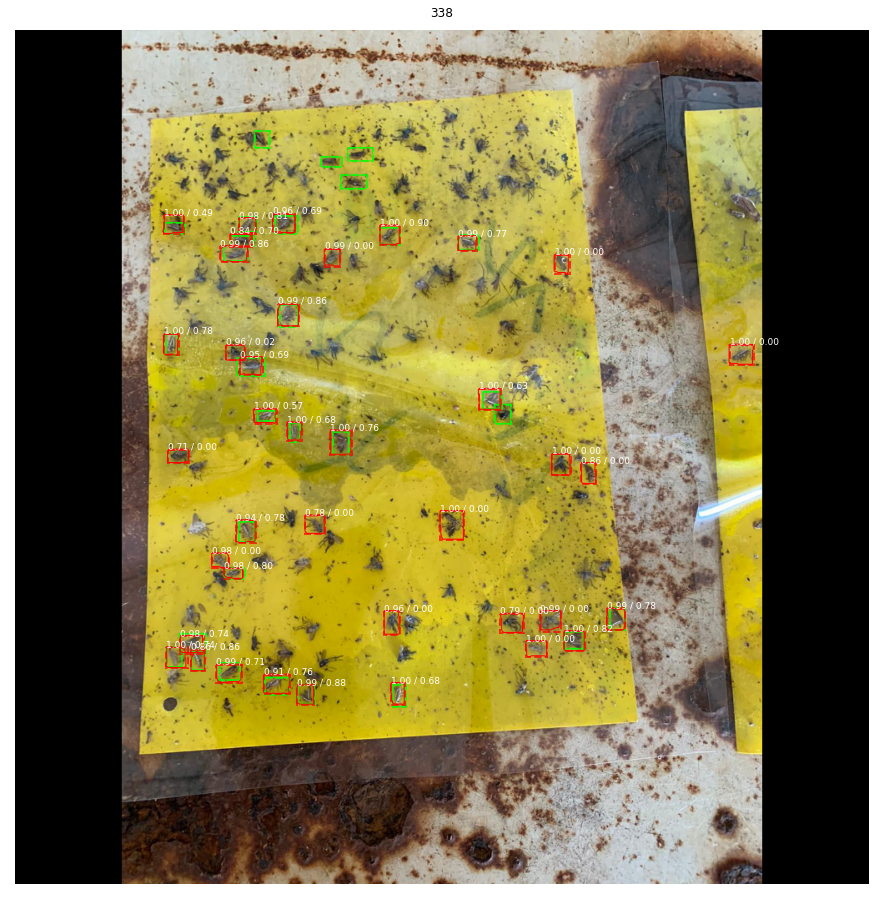

GTs: 30
Num of predictions: 39

AP: 0.5585079450603752
precision value: 0.6153846153846154
recall value: 0.8333333333333334
image_id:  33


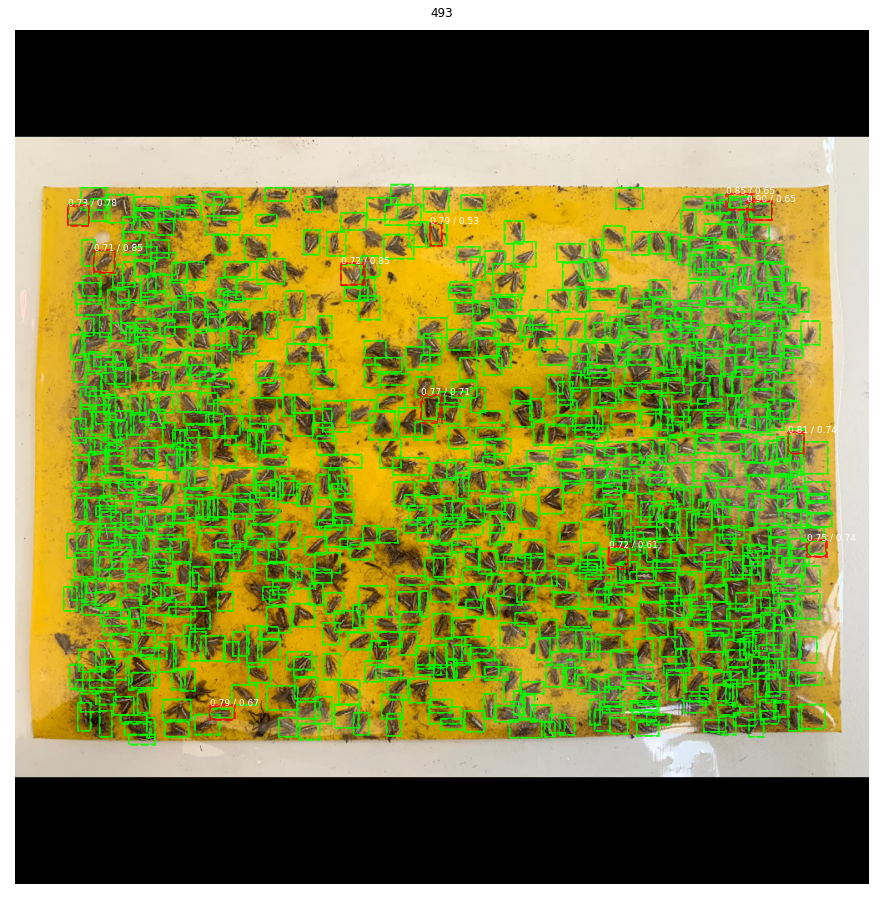

GTs: 868
Num of predictions: 11

AP: 0.012672810815274715
precision value: 1.0
recall value: 0.012672811059907835
image_id:  75


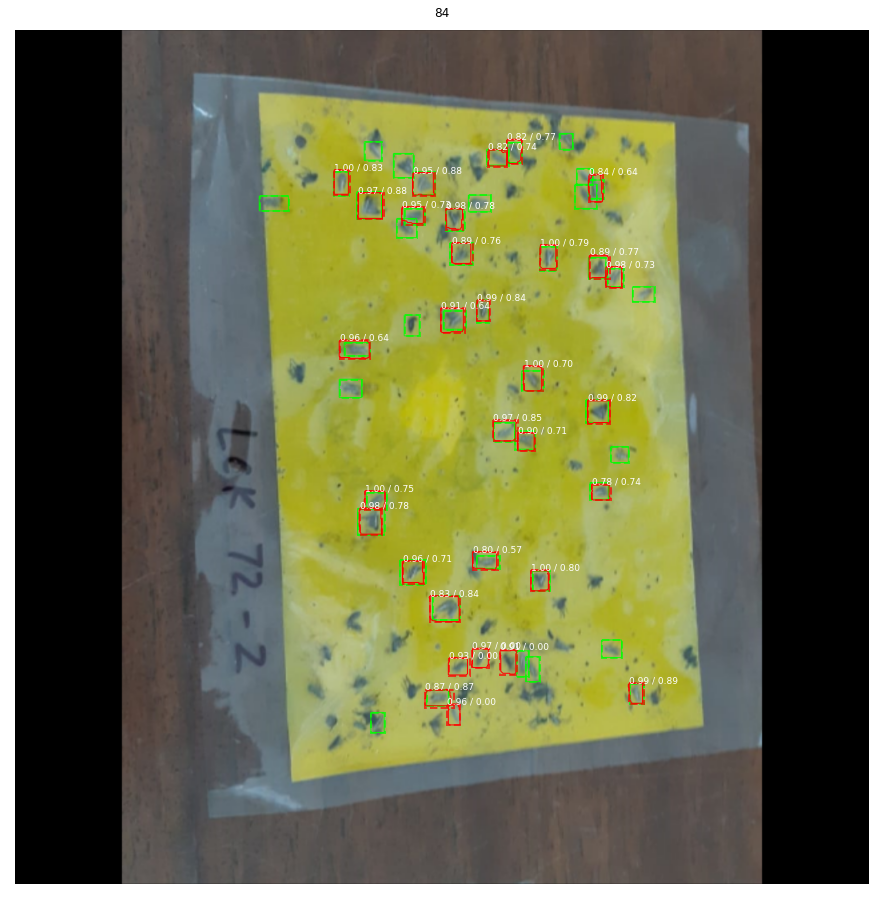

GTs: 44
Num of predictions: 32

AP: 0.5964214405469728
precision value: 0.875
recall value: 0.6363636363636364
image_id:  180


GTs: 38
Num of predictions: 29

AP: 0.6227819501502173
precision value: 0.8620689655172413
recall value: 0.6578947368421053


In [ ]:
for image_id in [173, 33, 75, 180]:
  image, image_meta, gt_class_id, gt_bbox, gt_mask = model.load_image_gt(valid_dataset, DBM_config, image_id, use_mini_mask=False)

  #print("===================================================================================================================")
  print("image_id: ", image_id)
  info = valid_dataset.image_info[image_id]
  results = DBM_model.detect([image], verbose=0)
  r = results[0]

  if len(gt_bbox) != 0:
    visualize.display_differences(image, gt_bbox, gt_class_id, gt_mask, 
                                  r['rois'], r['class_ids'], r['scores'], r['masks'], 
                                  valid_dataset.class_names, title=str(info["id"]), 
                                  ax=None, show_mask=False, show_box=True, 
                                  iou_threshold=0.5, score_threshold=0.5, save_image=False, filename = int(info["id"]))

    AP, precisions, recalls, _ =\
        utils.compute_ap(gt_bbox, gt_class_id, gt_mask, r['rois'], r['class_ids'], r['scores'], r['masks'], iou_threshold=0.5)

    recall, _ = utils.compute_recall(r['rois'], gt_bbox, 0.5)

    print("GTs:", len(gt_bbox))
    print("Num of predictions:", len(r['rois']))
    print("\nAP:", AP)
    print("precision value:", precisions[-2])
    print("recall value:", recall)

  else:
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                                valid_dataset.class_names, r['scores'], 
                                title=str(info["id"]), show_mask = False, save_image = True, filename = int(info["id"]))

    print("GTs: 0")
    print("Num of predictions:", len(r['rois']))